In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from scipy.stats import stats
from pprint import pprint



# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
#file to load
zip_zillow = "percent_output.csv"

#read the Zillow csv with Zip codes
zip_zillow_df = pd.read_csv(zip_zillow)

#display df
zip_zillow_df.head()

,Unnamed: 0,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,60657,0,0.641026,0.0,0.636943,0.000000,0.000000,0.632911,0.000000,0.628931,...,0.000000,0.209205,0.417537,0.415800,1.035197,1.024590,0.000000,-1.014199,-1.434426,-0.831601
1,10023,0,0.000000,0.0,0.000000,0.278552,0.000000,0.277778,0.000000,0.554017,...,-0.690521,-0.695322,-0.891152,-0.963391,-1.297017,-1.445466,-0.800000,-0.067204,-0.605245,-0.608931
2,77494,0,1.492537,0.0,-1.470588,0.000000,0.000000,-1.492537,-1.515152,0.000000,...,0.000000,0.884956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.877193,-0.884956
3,60614,0,0.502513,0.5,0.000000,0.000000,0.000000,0.000000,-0.497512,0.000000,...,0.190840,0.380952,0.379507,0.567108,0.375940,0.000000,-0.561798,-1.506591,-1.529637,-1.165049
4,77449,0,0.000000,0.0,0.000000,0.000000,2.040816,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.075269,1.063830,0.000000,-1.052632,0.000000,1.063830,1.052632,1.041667


In [3]:
#list all column names to prepare for clean up
zip_zillow_df.columns

Index(['Unnamed: 0', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12',
       ...
       '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
       '2019-05', '2019-06', '2019-07', '2019-08'],
      dtype='object', length=282)

In [4]:
#rename columns to make the df look more presentable
zip_df = zip_zillow_df.rename(columns={"Unnamed: 0" : "Zip Code"})
zip_df.head()

,Zip Code,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,60657,0,0.641026,0.0,0.636943,0.000000,0.000000,0.632911,0.000000,0.628931,...,0.000000,0.209205,0.417537,0.415800,1.035197,1.024590,0.000000,-1.014199,-1.434426,-0.831601
1,10023,0,0.000000,0.0,0.000000,0.278552,0.000000,0.277778,0.000000,0.554017,...,-0.690521,-0.695322,-0.891152,-0.963391,-1.297017,-1.445466,-0.800000,-0.067204,-0.605245,-0.608931
2,77494,0,1.492537,0.0,-1.470588,0.000000,0.000000,-1.492537,-1.515152,0.000000,...,0.000000,0.884956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.877193,-0.884956
3,60614,0,0.502513,0.5,0.000000,0.000000,0.000000,0.000000,-0.497512,0.000000,...,0.190840,0.380952,0.379507,0.567108,0.375940,0.000000,-0.561798,-1.506591,-1.529637,-1.165049
4,77449,0,0.000000,0.0,0.000000,0.000000,2.040816,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.075269,1.063830,0.000000,-1.052632,0.000000,1.063830,1.052632,1.041667


In [5]:
#calculate the "global" average for all zip codes in the USA per month and year
avg_df = zip_df.mean(axis=0)
avg_df.to_frame()

#save new data to a csv file
avg_df.to_csv("Global_Average.csv")
avg_df.head()

Zip Code    47697.871935
1996-04         0.000000
1996-05         0.151192
1996-06         0.154941
1996-07         0.088895
dtype: float64

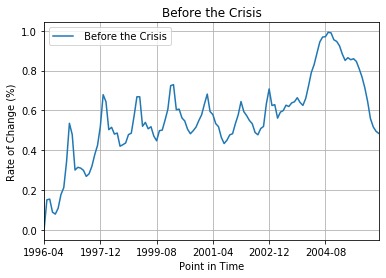

In [15]:
#make a line graph for the change in rates before the crisis
before_df = avg_df["1996-04" : "2006-03"]
before_df.plot(label = " Before the Crisis")

#format the graph
plt.legend()
plt.title("Before the Crisis")
plt.xlabel("Point in Time")
plt.ylabel("Rate of Change (%)")
plt.grid()

#save image
plt.savefig('Before_crisis.png')
plt.show()

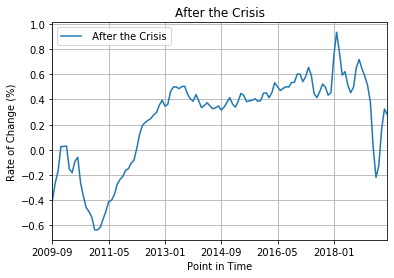

In [14]:
#make a line graph for the change in rates after the crisis
after_df = avg_df["2009-09" : "2019-08"]
after_df.plot(label = " After the Crisis")

#format the graph
plt.legend()
plt.title("After the Crisis")
plt.xlabel("Point in Time")
plt.ylabel("Rate of Change (%)")
plt.grid()

#save the image
plt.savefig('After_crisis.png')
plt.show()

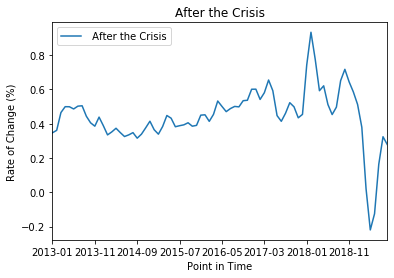

In [8]:
#do a third, optional plot to get a regression on the data after 2013 until present day
after_regression = avg_df["2013-01" : "2019-08"]
after_regression.plot(label = " After the Crisis")
plt.legend()
plt.title("After the Crisis")
plt.xlabel("Point in Time")
plt.ylabel("Rate of Change (%)")

plt.savefig('After_crisis_Regression.png')
plt.show()

In [11]:
#calculate the t-0test to get the P value for the relation between the prices before the crash and after the crash
stats.ttest_ind(before_df, after_df, equal_var=False)

Ttest_indResult(statistic=8.541804618548127, pvalue=4.478428261214477e-15)